In [25]:
import yfinance as yf

In [26]:
stock_symbol = 'GAIL.NS'

In [27]:
data = yf.download(tickers=stock_symbol,period='5y',interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [28]:
type(data)

pandas.core.frame.DataFrame

In [29]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-08,113.666664,115.050003,112.133331,112.500000,88.747253,11045511
2019-05-09,112.366669,113.816666,111.016663,113.466667,89.509827,8284242
2019-05-10,113.666664,114.599998,112.733330,113.849998,89.812218,5578368
2019-05-13,113.849998,114.266663,110.099998,110.683334,87.314140,5021220
2019-05-14,110.666664,118.433334,110.250000,115.050003,90.758858,13691946


In [30]:
len(data)

1237

In [31]:
data.shape

(1237, 6)

In [32]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-02,209.00,210.149994,201.699997,205.050003,205.050003,17430514
2024-05-03,207.00,208.500000,200.649994,203.800003,203.800003,15781876
2024-05-06,204.50,204.500000,196.100006,197.800003,197.800003,25048200
2024-05-07,198.25,198.850006,191.550003,192.750000,192.750000,15026421
2024-05-08,195.00,201.750000,193.800003,201.149994,201.149994,23504052


In [33]:
opn = data[['Open']]

<Axes: xlabel='Date'>

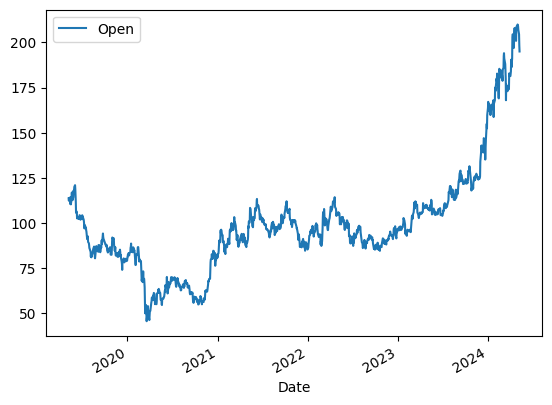

In [34]:
opn.plot()

In [35]:
import matplotlib.pyplot as plt
ds = opn.values

In [36]:
ds

array([[113.66666412],
       [112.3666687 ],
       [113.66666412],
       ...,
       [204.5       ],
       [198.25      ],
       [195.        ]])

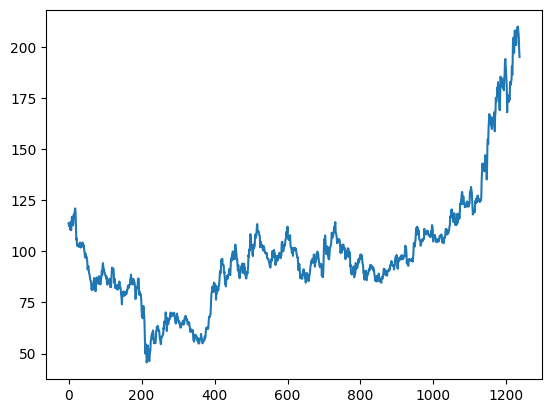

In [37]:
plt.plot(ds)

In [38]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [39]:
len(ds_scaled), len(ds)

(1237, 1237)

In [40]:
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [41]:
train_size,test_size

(865, 372)

In [42]:
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [43]:
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [44]:
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [45]:
X_train.shape,y_train.shape

((764, 100), (764,))

In [46]:
X_test.shape, y_test.shape

((271, 100), (271,))

In [47]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [48]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [49]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
12/12 [==============================] - 10s 322ms/step - loss: 0.0198 - val_loss: 0.0512
Epoch 2/100
12/12 [==============================] - 2s 182ms/step - loss: 0.0040 - val_loss: 0.0134
Epoch 3/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0022 - val_loss: 0.0219
Epoch 4/100
12/12 [==============================] - 4s 325ms/step - loss: 0.0014 - val_loss: 0.0089
Epoch 5/100
12/12 [==============================] - 2s 182ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 6/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 7/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 8/100
12/12 [==============================] - 2s 182ms/step - loss: 0.0010 - val_loss: 0.0038
Epoch 9/100
12/12 [==============================] - 3s 226ms/step - loss: 9.9809e-04 - val_loss: 0.0038
Epoch 10/100
12/12 [==============================] - 3s 263ms/step - loss: 0.0010 - v

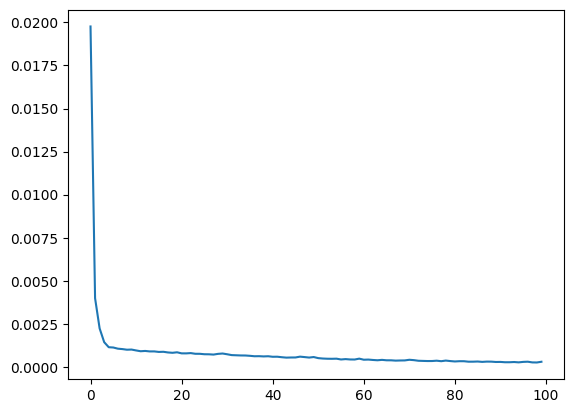

In [52]:
loss = model.history.history['loss']
plt.plot(loss)

In [53]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 0s 35ms/step


In [54]:
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

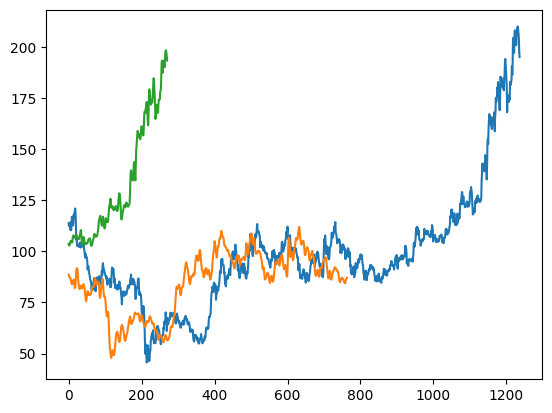

In [55]:
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [56]:
type(train_predict)

numpy.ndarray

In [57]:
test = np.vstack((train_predict,test_predict))

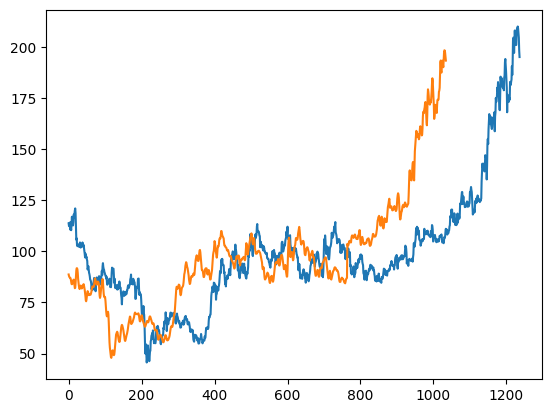

In [58]:
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [59]:
len(ds_test)

372

In [60]:
fut_inp = ds_test[270:]

In [61]:
fut_inp = fut_inp.reshape(1,-1)

In [62]:
tmp_inp = list(fut_inp)

In [63]:
fut_inp.shape

(1, 102)

In [64]:
tmp_inp = tmp_inp[0].tolist()

In [68]:
fut_inp = fut_inp[:101]

In [70]:
len(ds_scaled)

1237

In [71]:
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

In [73]:
ds_new = ds_scaled.tolist()

In [74]:
len(ds_new)

1237

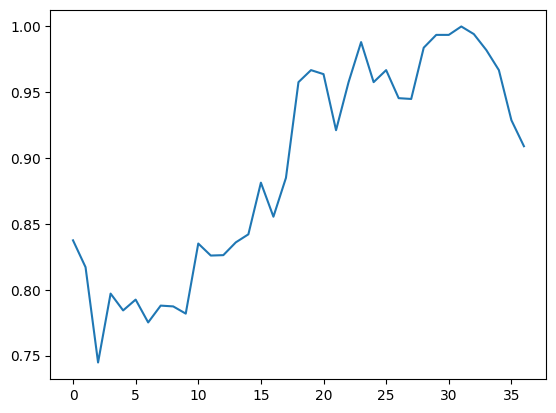

In [75]:
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

In [76]:
final_graph = normalizer.inverse_transform(ds_new).tolist()

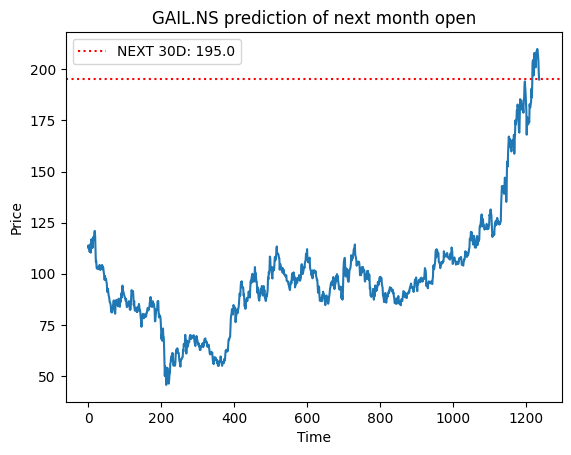

In [77]:
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()